# Введение в DS на УБ и МиРА (2022)

## Домашнее задание #4: Линейная регрессия

### Дедлайн: 10 июня 2022 года, 23:59

**Правила игры**

1. Домашнее задание состоит из трёх частей, которые оцениваются в 2 -- 4 -- 4 балла. Все пункты в пределах одной части имеют одинаковый вес.

2. Решения принимаются до **10 июня 2022 года, 23:59 МСК** включительно. Работы, отправленные после дедлайна, **не проверяются**. Дата и время сдачи определяются по последнему запушенному в репозиторий коммиту (можно увидеть на GitHub, наведя мышкой на указатель срока (например, 3 days ago) справа от файлов).

3. Все решения нужно загрузить в личный репозиторий на [GitHub Classroom](https://classroom.github.com/a/vX7_k1kZ).

4. Разрешается использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания. Разрешается использовать любые свободные источники с указанием ссылки на них.

5. Плагиат не допускается. При обнаружении случаев списывания, $0$ за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал. 

Для проверки гипотез используйте ваш любимый уровень значимости! 

---

В этом задании нам предстоит проанализировать набор данных [Weather in Szeged 2006-2016](https://www.kaggle.com/budincsevity/szeged-weather), содержащий информацию о погоде. В качестве зависимой переменной возьмём температуру воздуха в градусах Цельсия (`Temperature (C)`).

Наша цель состоит в том, чтобы построить две линейные регрессионные модели: объясняющую и предиктивную. Объясняющая модель должна быть пригодна для статистической интерпретации зависимостей, то есть показывать, какие факторы влияют на температуру воздуха, каким образом и какое возможное объяснение этого влияния можно привести. Предиктивная модель может быть совершенно ужасной с точки зрения статистики (например, все коэффициенты могут быть не значимы), но она должна давать хорошие прогнозы в соответствии с некоторой метрикой.

Хотя приведённые данные имеют формат временных рядов, мы будем игнорировать это и рассматривать их как обычные кросс-секционные данные (то есть как независимые наблюдения в пространстве).

### Часть 1: Предобработка данных (2 балла)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.** Загрузите данные из файла `weatherHistory.csv`. Выведите первые 5 строк таблицы.

In [ ]:
dframe = pd.read_csv('weatherHistory.csv')
dframe.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


**Задание 2.** Изучите статью о том, что такое [apparent temperature](https://www.kxan.com/weather/difference-between-temperature-and-feels-like-temperature/) (также называемая "feels-like temperature" и "heat index"). Удалите какую-то переменную из набора данных и поясните, почему вы её удалили (помните о том, какая переменная будет целевой). Также удалите переменные:
- `Formatted Date` (потому что договорились, что не обращаем внимания на даты).
- `Daily Summary` (будем использовать просто `Summary`). 

In [ ]:
#Удаляются переменные: Дата, Daily Summary, Pressure (millibars)
#Третья переменная была выбрана, так как в основном значения в столбце "Pressure" не сильно изменяются
#Это не будет давать дополнительной информации
dframe=dframe.drop(['Formatted Date', 'Daily Summary', 'Pressure (millibars)'], axis=1)
dframe

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0
...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0


**Задание 3.** Есть ли в наборе данных пропущенные значения? Если да, удалите их.

In [ ]:
#Да, есть пропущенные значения
#517 в колонке Precip Type
print(dframe.isnull().sum())

Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
dtype: int64


In [ ]:
#Удаляются пропущенные значения
dframe=dframe.dropna(how='any')
print(dframe.isnull().sum())

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
dtype: int64


**Задание 4.** В данных есть одна числовая переменная, которая не несёт информации для предсказания целевой переменной. Найдите эту переменную, поясните ваш выбор и удалите её. 

In [ ]:
#Выводит уникальные значения в признаке
#Как оказалось, только 0.0
fd['Loud Cover'].unique()

NameError: ignored

In [ ]:
dframe=dframe.drop(columns=['Loud Cover'], axis=1)
dframe

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km)
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263
...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000
96449,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526
96450,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000
96451,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000


**Задание 5.** Постройте диаграммы рассеяния всех числовых переменных против целевой (для этого используйте какой-то метод из `seaborn`). Есть ли переменные, для которых наблюдается очевидная нелинейная зависимость?

**Подсказка:** это пригодится для частей 2 и 3.

<AxesSubplot:xlabel='Apparent Temperature (C)', ylabel='Temperature (C)'>

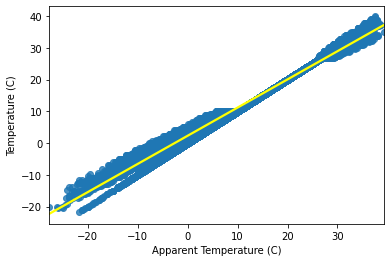

In [ ]:
#Выводит график зависимости двух переменных
#Apparent Temperature и Temperature
#Желтая линия показывает соотношение
sns.regplot(x='Apparent Temperature (C)', 
    y='Temperature (C)', 
    data=dframe, line_kws={"color": "yellow"})

<AxesSubplot:xlabel='Wind Speed (km/h)', ylabel='Temperature (C)'>

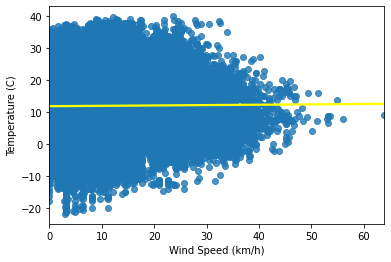

In [ ]:
sns.regplot(x='Wind Speed (km/h)', 
    y='Temperature (C)', 
    data=dframe, line_kws={"color": "yellow"})

<AxesSubplot:xlabel='Visibility (km)', ylabel='Temperature (C)'>

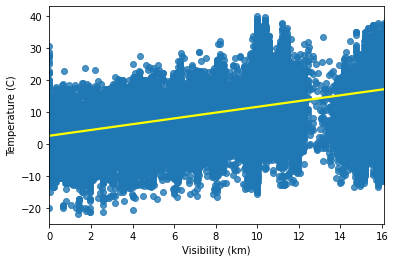

In [ ]:
sns.regplot(x='Visibility (km)', 
    y='Temperature (C)', 
    data=dframe, line_kws={"color": "yellow"})

<AxesSubplot:xlabel='Wind Bearing (degrees)', ylabel='Temperature (C)'>

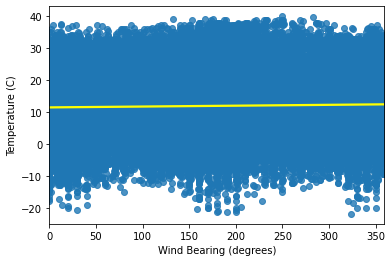

In [ ]:
sns.regplot(x='Wind Bearing (degrees)', 
    y='Temperature (C)', 
    data=dframe, line_kws={"color": "yellow"})

<AxesSubplot:xlabel='Humidity', ylabel='Temperature (C)'>

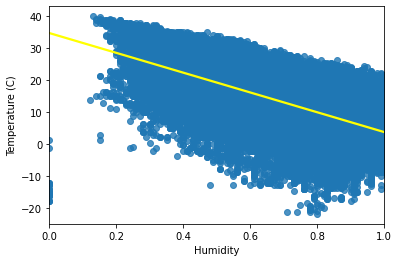

In [ ]:
sns.regplot(x='Humidity', 
    y='Temperature (C)', 
    data=dframe, line_kws={"color": "yellow"})

Вывод: Apparent Temperature, Humidity и Visibility (km) коррелируют с переменной Temperature

**Задание 6.** Преобразуйте категориальные переменные при помощи One Hot Encoding (то есть переведите их в дамми-переменные).

In [ ]:
dframe2 = pd.get_dummies(data=dframe, drop_first=True)
dframe2

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,Summary_Breezy and Overcast,...,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_snow
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
96449,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
96450,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
96451,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


**Задание 7.** Выведите корреляционную матрицу переменных. Какие переменные лучше всего коррелируют с целевой (назовите три)? 

**Подсказка:** это пригодится для частей 2 и 3.

In [ ]:
corr = dframe2.corr()
corr.style.background_gradient(cmap='coolwarm')

#Source: https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,Summary_Breezy and Overcast,Summary_Breezy and Partly Cloudy,Summary_Clear,Summary_Dangerously Windy and Partly Cloudy,Summary_Drizzle,Summary_Dry,Summary_Dry and Mostly Cloudy,Summary_Dry and Partly Cloudy,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Humid and Overcast,Summary_Humid and Partly Cloudy,Summary_Light Rain,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_snow
Temperature (C),1.000000,0.992637,-0.632148,0.008304,0.029937,0.393719,0.003093,-0.024854,-0.006512,-0.036528,0.003664,0.001308,-0.001011,-0.002304,0.033726,0.018805,0.045897,-0.310437,0.019089,0.008545,0.013392,-0.005141,0.046225,-0.211532,0.300242,-0.001968,-0.004901,0.005155,-0.000044,-0.000212,-0.009072,-0.005450,-0.563503
Apparent Temperature (C),0.992637,1.000000,-0.602390,-0.057387,0.028951,0.382589,0.003087,-0.032558,-0.014971,-0.051157,-0.005178,0.007751,-0.002223,-0.001601,0.030588,0.016983,0.042256,-0.292961,0.019101,0.008490,0.013298,-0.005506,0.045561,-0.216620,0.297419,-0.001196,-0.007544,0.004664,-0.000659,-0.001975,-0.014484,-0.010634,-0.566058
Humidity,-0.632148,-0.602390,1.000000,-0.224569,0.000814,-0.370511,-0.007833,0.019885,-0.036740,0.010758,-0.061388,-0.010190,-0.004039,0.013715,-0.048538,-0.030412,-0.075607,0.312506,0.014547,0.006398,0.007753,0.020072,-0.031679,0.239445,-0.309874,0.011068,-0.007575,-0.008163,0.005449,-0.013161,-0.002897,-0.027829,0.232622
Wind Speed (km/h),0.008304,-0.057387,-0.224569,1.000000,0.104366,0.100801,0.010732,0.062587,0.239942,0.238982,0.208731,-0.137518,0.024747,-0.001307,0.010635,0.004997,0.006490,-0.148718,-0.002202,-0.001314,-0.001667,0.014329,0.055248,0.080466,-0.070561,-0.007387,0.041382,0.013736,0.031139,0.089196,0.101960,0.129135,-0.067771
Wind Bearing (degrees),0.029937,0.028951,0.000814,0.104366,1.000000,0.048900,0.001578,-0.004784,0.027475,0.018017,0.042476,-0.028513,0.003592,-0.001918,0.007500,0.000030,0.010306,-0.049201,-0.006484,-0.003871,0.001752,-0.001613,0.027994,-0.016621,0.016422,0.002309,0.011245,-0.001128,-0.001955,0.013149,0.011457,0.026489,-0.042142
Visibility (km),0.393719,0.382589,-0.370511,0.100801,0.048900,1.000000,-0.000294,-0.040006,0.019661,0.012559,0.014675,0.100740,0.000839,-0.011077,-0.000503,-0.000715,0.004486,-0.597414,-0.003081,-0.002680,0.000865,-0.022752,0.117192,-0.119702,0.244970,-0.020997,0.000766,-0.000294,-0.013086,0.003649,-0.002886,0.007105,-0.316483
Summary_Breezy and Dry,0.003093,0.003087,-0.007833,0.010732,0.001578,-0.000294,1.000000,-0.000062,-0.000237,-0.000240,-0.000205,-0.001148,-0.000010,-0.000065,-0.000061,-0.000039,-0.000097,-0.000914,-0.000066,-0.000028,-0.000043,-0.000083,-0.002068,-0.001472,-0.002265,-0.000033,-0.000029,-0.000010,-0.000021,-0.000062,-0.000070,-0.000085,-0.001145
Summary_Breezy and Foggy,-0.024854,-0.032558,0.019885,0.062587,-0.004784,-0.040006,-0.000062,1.000000,-0.001405,-0.001421,-0.001214,-0.006791,-0.000062,-0.000385,-0.000360,-0.000231,-0.000572,-0.005408,-0.000390,-0.000163,-0.000254,-0.000490,-0.012238,-0.008712,-0.013400,-0.000195,-0.000174,-0.000062,-0.000123,-0.000365,-0.000414,-0.000505,0.040020
Summary_Breezy and Mostly Cloudy,-0.006512,-0.014971,-0.036740,0.239942,0.027475,0.019661,-0.000237,-0.001405,1.000000,-0.005471,-0.004674,-0.026141,-0.000237,-0.001483,-0.001385,-0.000888,-0.002203,-0.020816,-0.001502,-0.000628,-0.000979,-0.001885,-0.047108,-0.033535,-0.051580,-0.000751,-0.000672,-0.000237,-0.000475,-0.001405,-0.001593,-0.001944,-0.014306
Summary_Breezy and Overcast,-0.036528,-0.051157,0.010758,0.238982,0.018017,0.012559,-0.000240,-0.001421,-0.005471,1.000000,-0.004728,-0.026445,-0.000240,-0.001500,-0.001401,-0.000899,-0.002228,-0.0210

С целевой переменной лучше всего коррелируют Apparent Temperature (C), Humidity , Precip Type_snow	

**Задание 8.** Разделите данные на регрессоры (`X`) и целевую переменную (`y`). Если всё сделано правильно, то `X` и `y` должны иметь размеры, указанные ниже.

In [ ]:
y = dframe2['Temperature (C)']

In [ ]:
X = dframe2.iloc[:,1:33]
X
#https://stackoverflow.com/questions/53991131/how-to-split-data-frame-into-x-and-y

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,Summary_Breezy and Overcast,Summary_Breezy and Partly Cloudy,...,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Summary_Windy and Partly Cloudy,Precip Type_snow
0,7.388889,0.89,14.1197,251.0,15.8263,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,7.227778,0.86,14.2646,259.0,15.8263,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,9.377778,0.89,3.9284,204.0,14.9569,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5.944444,0.83,14.1036,269.0,15.8263,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,6.977778,0.83,11.0446,259.0,15.8263,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,26.016667,0.43,10.9963,31.0,16.1000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
96449,24.583333,0.48,10.0947,20.0,15.5526,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
96450,22.038889,0.56,8.9838,30.0,16.1000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
96451,21.522222,0.60,10.5294,20.0,16.1000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
print('X:', X.shape)
print('y:', y.shape)

X: (95936, 32)
y: (95936,)


**Задание 8.** Похоже ли распределение целевой переменной на нормальное? Поясните, почему важно, чтобы распределение `y` было похоже на нормальное.

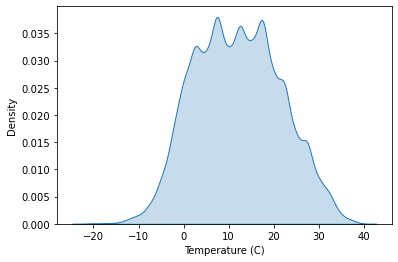

In [ ]:
snsplot = sns.kdeplot(dframe['Temperature (C)'], shade=True)
fig = snsplot.get_figure()

#Источник https://habr.com/ru/post/470535/

Да, можно увидеть график похожий на нормальное распределение, так как среднее значение встречается чаще всего именно в центре. Следовательно, "распределение у" является нормальным распределением. Это имеет очень важную значимость для анализа. Нормализация данных способствует более точному предсказанию данных, которые понадобятся нам в дальнейшей работе анализа.


### Часть 2: Построение объясняющей модели (4 балла)

**Задание 9.** На основании предыдущего анализа и логических соображений выберите шесть регрессоров (не считая константный), которые будут включены в объясняющую модель. Помните, что когда мы строим объясняющую модель, выбор переменных должнен быть обоснован (не достаточно использовать предыдущий анализ, выбор каждой переменной должен иметь теоретическое или логическое обоснование). В качестве регрессоров можно брать переменные из `X` или преобразования над ними (`Humidity` и `Humidity`$^2$ будем считать разными регрессорами). 

Создайте ячейку Markdown ниже и запишите в неё функциональный вид модели, которую вы будете оценивать. Поясните выбор регрессоров (не нужно углубляться в физику поведения жидкостей и ссылаться на уравнения Навье-Стокса, достаточно понятной научно-популярной интерпретации) и, если используете, выбор нелинейных преобразований над ними.

**Пример ответа:** я строю модель

$$
y_i = \beta_0 + \beta_1 Apparent Temperature + \beta_2 Humidity + \beta_3 Precip Type\_snow + \beta_4 Visibility (km) + \beta_5 Summary\_Partly Cloudy ^ 2 + \beta_6 Summary\_Foggy + \varepsilon_i
$$
	
Обоснование выбора переменных:
- $Apparent Temperature$ – так как в графике и корреляции показал высокие значения.
- $Precip Type\_snow$ – потому что так же в 7 задании показал высокую обратную корреляцию.
- $Summary\_Partly Cloudy$ – потому что, очевидно, что облачность закрывает солнце, следовательно температура понижается.
- $Humidity$ – потому что мне кажется, в 5 и 7 задании показал высокую обратную пропорциональность.
- $Summary\_Foggy$ – потому что при туманности влажность повышается до 80-90%, температура понижается.
- $Visibility$ – потому что низкая видимость изначает плохую погоду - туман/облачность/дождь. Выше видимость, выше температура. 

**Задание 10.** Выделите выбранные признаки в переменную `X1`. 

In [ ]:
X1 = dframe2[['Apparent Temperature (C)', 'Precip Type_snow', 'Humidity',
         'Summary_Partly Cloudy','Summary_Foggy', 'Visibility (km)']]

**Задание 11.** Оцените модель при помощи МНК (минимзации MSE). Прокомментируйте значимость коэффициентов.

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X1, y)
y_predict = model.predict(X1)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y, y_predict))

1.154717137820845

в среднем предсказания отличаются на 1.15, что является хорошим результатом и говорит о качественной модели

In [ ]:
#Коэффиценты регресии: 'Apparent Temperature (C)', 'Precip Type_snow', 'Humidity',
#         'Summary_Partly Cloudy','Summary_Foggy', 'Visibility (km)'
model.coef_

array([ 8.51074865e-01, -2.59972984e-01, -2.59489338e+00, -6.68798132e-02,
       -4.79046978e-01, -7.36565282e-04])

**Задание 12.** Поясните, как каждый регрессор влияет на зависимую переменную 
1. математически ("при увеличении $X$ на 1 $Y$ увеличивается на 3") и 
2. содержательно ("$X$ влияет на $Y$ положительно, потому что...", "$X$ не оказывает влияния на $Y$, потому что...").

При увеличении Apparent Temperature (C) на 1 градус, Temperature (C) увеличивается на 0.85  
Apparent Temperature (C) влияет положительно, потому что первая высчитывается из второй по формуле.

При Precip Type_snow, Temperature (C) уменьшается на 0.26  
Precip Type_snow (C) влияет негативно, потому что снег появляется при температуре ниже 0.

При увеличении Humidity на 1 единицу измерения, Temperature (C) уменьшается на 2.6  
Humidity влияет негативно, потому что при повышении температуры, влага испаряется и уменьшается влажность.

При Summary_Partly Cloudy, Temperature (C) уменьшается на 0.07  
Summary_Partly Cloudy влияет негативно, потому что облачность перекрывает лучи солнца, а значит температура снижается.

При Summary_Foggy, Temperature (C) уменьшается на 0.48 
Summary_Foggy влияет негативно, потому что туманность подразумевает высокий уровень влаги, следовательно температура понижается.

При увеличении Visibility на 1 км, Temperature (C) уменьшается на 0.00074  
Visibility негативно влияет на температуру.

**Задание 13.** Рассчитайте $R^2$ и MSE на выборке `X1`. Прокомментируйте качество подгонки регрессии.

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y, y_predict))

print(mean_squared_error(y, y_predict))

0.9873934747958514
1.154717137820845


Модель может объяснить 98.7% данных.

В среднем предсказанные данные отличаются от настоящих данных на 1.15, что является хорошим результатом и говорит о качественной модели.

### Часть 3: Построение предсказательной модели (4 балла)

В предыдущей части мы хотели объяснить $y$ при помощи каких-то регрессоров, которые мы отбирали из теоретико-логических соображений. Теперь поставим другую задачу: мы не хотим ничего объяснять, а хотим только хорошо предсказывать $y$ по новым наблюдениям. Код ниже поделит выборку (`X`, `y`) на обучающую (`X_train`, `y_train`), на которой будем *оценивать* модель, и *тестовую* (`X_test`, `y_test`), на которой будем предсказывать. 

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**Задание 14.** Сохраните в переменные `X_train_1` и `X_test_1` те же признаки из `X_train` и `X_test` соответственно, что и в `X1` (то есть те, которые вы выбрали в задании 9).

Оцените модель на выборке `X_train_1`. Сделайте предсказания на выборках `X_train_1` (то есть обучающей) и `X_test_1` (то есть тестовой). Рассчитайте `MAE` на этих выборках.

In [ ]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y, test_size = 0.3)

model2 = LinearRegression().fit(X_train_1, y_train_1)

y_predict_train_1 = model2.predict(X_train_1)
y_predict_test_1 = model2.predict(X_test_1)

print('МНК Обуч выборки:',mean_absolute_error(y_train_1, y_predict_train_1))

МНК Обуч выборки: 0.8230708293710448


In [ ]:
from sklearn.metrics import mean_absolute_error

print('МНК Тест выборки:',mean_absolute_error(y_test_1, y_predict_test_1))

МНК Тест выборки: 0.8246962304413054


In [ ]:
print(r2_score(y_train_1, y_predict_train_1))
print(r2_score(y_test_1, y_predict_test_1))

0.9873779206212464
0.9874267642642156


**Задание 15.** Теперь сохраните в переменные `X_train_2` и `X_test_2` те же признаки из `X_train` и `X_test` соответственно, что и в `X1` (то есть те, которые вы выбрали в задании 9) и ещё какие-то признаки (количество выберите на ваш вкус, главное, чтобы всего признаков было больше, чем в `X1`). Оцените модель на выборке `X_train_2`. Сделайте предсказания на выборках `X_train_2` (то есть обучающей) и `X_test_2` (то есть тестовой). Рассчитайте `MAE` на этих выборках. Удалось ли повысить качество на обучающей выборке? А на тестовой? Поясните. 

In [ ]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size = 0.3)

model3= LinearRegression().fit(X_train_2, y_train_2)

y_pred_train_2 = model3.predict(X_train_2)
y_pred_test_2 = model3.predict(X_test_2)

print('МНК Обуч выборки:',mean_absolute_error(y_train_2, y_pred_train_2))
print('МНК Тест выборки:',mean_absolute_error(y_test_2, y_pred_test_2))

МНК Обуч выборки: 0.7341777129139764
МНК Обуч выборки: 0.7419795788313834


Да, удалось повысить качество на обучающей и тестовой. Средняя ошибка предсказанного значения от настоящего уменьшилась на 0,1

**Задание 16.** Прокомментируйте значимость коэффициентов модели, оценённой на `X_train_2`.

In [ ]:
col = X.columns
list(zip(col, model3.coef_))
#различные значение множества коэффициентов, где отображается влияние их изменений на общую модель и ее поведение
#учитывать изменений в коэффициентов модели необходимо, так как это сильно влияет на все модели и на логику задания

[('Apparent Temperature (C)', 0.8738873510781153),
 ('Humidity', -1.306729030295603),
 ('Wind Speed (km/h)', 0.08765979332500445),
 ('Wind Bearing (degrees)', -0.0003993477485575436),
 ('Visibility (km)', -5.82648329184865e-05),
 ('Summary_Breezy and Dry', -3.1494275805801215),
 ('Summary_Breezy and Foggy', 0.8598606498576525),
 ('Summary_Breezy and Mostly Cloudy', -1.7640627942986966),
 ('Summary_Breezy and Overcast', -0.949906376944575),
 ('Summary_Breezy and Partly Cloudy', -1.6705736582724455),
 ('Summary_Clear', -0.6942820109706443),
 ('Summary_Dangerously Windy and Partly Cloudy', -2.217540986648716),
 ('Summary_Drizzle', -0.8409257536072434),
 ('Summary_Dry', 0.39289476583665134),
 ('Summary_Dry and Mostly Cloudy', -0.14424316436062476),
 ('Summary_Dry and Partly Cloudy', -0.16276632316014678),
 ('Summary_Foggy', -0.9933956951565278),
 ('Summary_Humid and Mostly Cloudy', -0.4004791310123096),
 ('Summary_Humid and Overcast', -0.3555332053720197),
 ('Summary_Humid and Partly Cloud

**Задание 17.** Будем называть модель, оценённую на `X_train_1`, **объясняющей**, а на `X_train_2` – **предсказательной**. На основании заданий 14 и 15 сделайте вывод, подходит ли объясняющая модель для предсказаний. На основании задания 16 сделайте вывод, подходит ли предсказательная модель для объяснительной интерпретации. 

Сравнивая обе модели после проделанной работы можно сделать вывод, что X_train_2 модель лучше предсказывает данные. Однако, именно с предсказательной моделью труднее объяснять все коэффициенты регрессора. 

Объясняющая модель предсказывает хуже, но в ней всего 6 переменных, то её проще интерпретировать для анализа. Поэтому предсказательная модель подходит для анализа объяснительной моделью.

## Safe Area

Если хотите, напишите здесь что угодно. Можно вставить картинку.